In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Nischal Chaututhi',
 'Udgam Chhetri',
 'Sajit Magranti',
 'Aditya Bishta',
 'Ayush Kone',
 'Nikkon Poudya',
 'Krishh Humegain',
 'Milan Karnjit',
 'Shamar Poudel',
 'Shekhar Bithari']

In [7]:
total_customer = 500000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [11]:
df.gender.value_counts()

Male                 261138
Female               185699
Other                 34879
Prefer not to say     18284
Name: gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['email'] = df.name.apply(email_gen)

In [14]:
df

,name,gender,email
0,Satish Maharajan,Male,satish.maharajan@fakeemail.com
1,Finjo Barjacharya,Male,finjo.barjacharya@fakeemail.com
2,Malkit Bhattaraui,Other,malkit.bhattaraui@fakeemail.com
3,Mitra mani Tukuria,Male,mitra.mani@fakeemail.com
4,Mitra mani Gole,Male,mitra.mani@fakeemail.com
...,...,...,...
209995,Roshika Kewat,Female,roshika.kewat@fakeemail.com
209996,Soneeya Agrwal,Prefer not to say,soneeya.agrwal@fakeemail.com
209997,Sajita Pyakural,Female,sajita.pyakural@fakeemail.com
209998,Nisu Lageju,Female,nisu.lageju@fakeemail.com


In [15]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,name,gender,email,phone
0,Satish Maharajan,Male,satish.maharajan@fakeemail.com,9841117453
1,Finjo Barjacharya,Male,finjo.barjacharya@fakeemail.com,9841355800
2,Malkit Bhattaraui,Other,malkit.bhattaraui@fakeemail.com,9841906047
3,Mitra mani Tukuria,Male,mitra.mani@fakeemail.com,9841504409
4,Mitra mani Gole,Male,mitra.mani@fakeemail.com,9841932328
...,...,...,...,...
209995,Roshika Kewat,Female,roshika.kewat@fakeemail.com,9841530133
209996,Soneeya Agrwal,Prefer not to say,soneeya.agrwal@fakeemail.com,9841846969
209997,Sajita Pyakural,Female,sajita.pyakural@fakeemail.com,9841455741
209998,Nisu Lageju,Female,nisu.lageju@fakeemail.com,9841878924


In [17]:
df['channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [19]:
df

,name,gender,email,phone,channel
0,Satish Maharajan,Male,satish.maharajan@fakeemail.com,9841117453,Other
1,Finjo Barjacharya,Male,finjo.barjacharya@fakeemail.com,9841355800,Facebook/Ads
2,Malkit Bhattaraui,Other,malkit.bhattaraui@fakeemail.com,9841906047,Google Search
3,Mitra mani Tukuria,Male,mitra.mani@fakeemail.com,9841504409,Facebook/Ads
4,Mitra mani Gole,Male,mitra.mani@fakeemail.com,9841932328,Word of Mouth
...,...,...,...,...,...
209995,Roshika Kewat,Female,roshika.kewat@fakeemail.com,9841530133,Google Search
209996,Soneeya Agrwal,Prefer not to say,soneeya.agrwal@fakeemail.com,9841846969,Google Search
209997,Sajita Pyakural,Female,sajita.pyakural@fakeemail.com,9841455741,Other
209998,Nisu Lageju,Female,nisu.lageju@fakeemail.com,9841878924,Facebook/Ads


In [20]:
df.channel.value_counts()

Facebook/Ads     191922
Google Search    137124
Other             87842
Word of Mouth     83112
Name: channel, dtype: int64

In [21]:
df['first_contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [23]:
df

,name,gender,email,phone,channel,first_contact
0,Satish Maharajan,Male,satish.maharajan@fakeemail.com,9841117453,Other,browser
1,Finjo Barjacharya,Male,finjo.barjacharya@fakeemail.com,9841355800,Facebook/Ads,app
2,Malkit Bhattaraui,Other,malkit.bhattaraui@fakeemail.com,9841906047,Google Search,app
3,Mitra mani Tukuria,Male,mitra.mani@fakeemail.com,9841504409,Facebook/Ads,browser
4,Mitra mani Gole,Male,mitra.mani@fakeemail.com,9841932328,Word of Mouth,browser
...,...,...,...,...,...,...
209995,Roshika Kewat,Female,roshika.kewat@fakeemail.com,9841530133,Google Search,browser
209996,Soneeya Agrwal,Prefer not to say,soneeya.agrwal@fakeemail.com,9841846969,Google Search,browser
209997,Sajita Pyakural,Female,sajita.pyakural@fakeemail.com,9841455741,Other,browser
209998,Nisu Lageju,Female,nisu.lageju@fakeemail.com,9841878924,Facebook/Ads,browser


In [24]:
df['first_contact'].value_counts()

browser    430253
app         69747
Name: first_contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,name,gender,email,phone,channel,first_contact
38274,Samixya Nembang,Female,samixya.nembang@fakeemail.com,9841284577,Google Search,app
36118,Sajita Kuikel,Female,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser
234357,Santosh Tuladahar,Male,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser
177150,Anjan Lal,Male,anjan.lal@fakeemail.com,9841998716,Google Search,browser
57931,Rajesh Lawati,Male,rajesh.lawati@fakeemail.com,9841684849,Other,browser
...,...,...,...,...,...,...
71192,Finjo Chaudhry,Other,finjo.chaudhry@fakeemail.com,9841071516,Google Search,browser
159222,Nisu Tiruwa,Female,nisu.tiruwa@fakeemail.com,9841486228,Google Search,browser
101771,Nirmal Acharyani,Male,nirmal.acharyani@fakeemail.com,9841047062,Facebook/Ads,browser
36625,Alina Mushyakhow,Female,alina.mushyakhow@fakeemail.com,9841212680,Other,browser


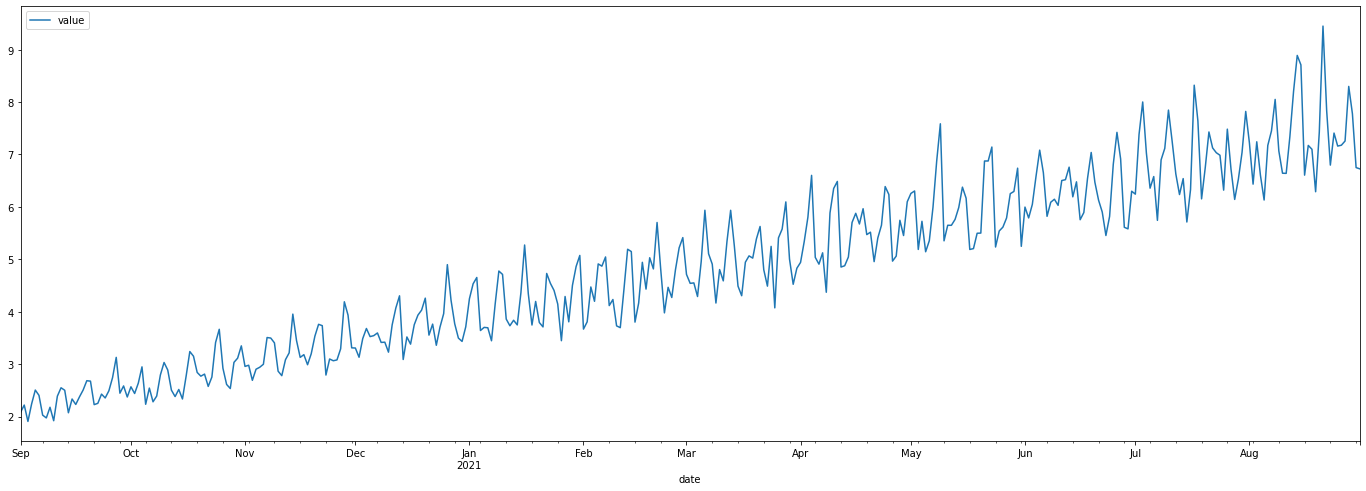

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [77]:
data = g.generate()

In [78]:
data['rows'] = (250*data.value).astype(int)

In [79]:
data.rows.sum()

438856

In [80]:
data

,date,base_amount,my_linear_trend,white_noise,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,2.000000,0.933832,1.0,1.867665,1.867665,466
1,2020-09-02,1.0,2.013699,1.047982,1.0,2.110319,2.110319,527
2,2020-09-03,1.0,2.027397,1.019348,1.0,2.066624,2.066624,516
3,2020-09-04,1.0,2.041096,1.112163,1.1,2.497035,2.497035,624
4,2020-09-05,1.0,2.054795,0.980813,1.2,2.418443,2.418443,604
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,6.931507,0.976422,1.1,7.444881,7.444881,1861
361,2021-08-28,1.0,6.945205,1.073519,1.2,8.946974,8.946974,2236
362,2021-08-29,1.0,6.958904,0.791119,1.2,6.606387,6.606387,1651
363,2021-08-30,1.0,6.972603,0.906749,1.0,6.322404,6.322404,1580


In [81]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = num + 75
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = num + 50
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = num + 130
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 1.15)
    return num

In [82]:
data['rows'] = data.apply(nepali_holiday, axis=1)

In [83]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [84]:
final_dates = (data.apply(create_list, axis=1).sum())

In [85]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [86]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_66381/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [87]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Samixya Nembang,Female,samixya.nembang@fakeemail.com,9841284577,Google Search,app,2020-09-01 00:00:00
1,Sajita Kuikel,Female,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser,2020-09-01 00:00:00
2,Santosh Tuladahar,Male,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser,2020-09-01 00:00:00
3,Anjan Lal,Male,anjan.lal@fakeemail.com,9841998716,Google Search,browser,2020-09-01 00:00:00
4,Rajesh Lawati,Male,rajesh.lawati@fakeemail.com,9841684849,Other,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
454129,Reeya Tanukar,Female,reeya.tanukar@fakeemail.com,9841665881,Other,browser,2021-08-31 00:00:00
454130,Peter Khawaunju,Male,peter.khawaunju@fakeemail.com,9841035516,Google Search,browser,2021-08-31 00:00:00
454131,Amrit Shraff,Male,amrit.shraff@fakeemail.com,9841889618,Google Search,browser,2021-08-31 00:00:00
454132,Alina Gurau,Female,alina.gurau@fakeemail.com,9841450238,Facebook/Ads,browser,2021-08-31 00:00:00


In [88]:
clients.gender.value_counts()

Male                 237077
Female               168753
Other                 31642
Prefer not to say     16662
Name: gender, dtype: int64

In [89]:
clients.channel.value_counts()

Facebook/Ads     174279
Google Search    124536
Other             79903
Word of Mouth     75416
Name: channel, dtype: int64

In [90]:
clients['first_contact'].value_counts()

browser    390738
app         63396
Name: first_contact, dtype: int64

In [91]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [92]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_66381/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [93]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_66381/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [94]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Samixya Nembang,Female,samixya.nembang@fakeemail.com,9841284577,Google Search,app,2020-09-01 15:31:14.440880,100000000
1,Sajita Kuikel,Female,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser,2020-09-01 19:07:04.113621,100000001
2,Santosh Tuladahar,Male,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser,2020-09-01 03:46:49.925233,100000002
3,Anjan Lal,Male,anjan.lal@fakeemail.com,9841998716,Google Search,browser,2020-09-01 06:51:56.877584,100000003
4,Rajesh Lawati,Male,rajesh.lawati@fakeemail.com,9841684849,Other,browser,2020-09-01 04:03:31.173484,100000004
...,...,...,...,...,...,...,...,...
454129,Reeya Tanukar,Female,reeya.tanukar@fakeemail.com,9841665881,Other,browser,2021-08-31 14:23:46.319799,100454129
454130,Peter Khawaunju,Male,peter.khawaunju@fakeemail.com,9841035516,Google Search,browser,2021-08-31 09:33:43.875420,100454130
454131,Amrit Shraff,Male,amrit.shraff@fakeemail.com,9841889618,Google Search,browser,2021-08-31 07:39:18.822637,100454131
454132,Alina Gurau,Female,alina.gurau@fakeemail.com,9841450238,Facebook/Ads,browser,2021-08-31 08:10:36.469236,100454132


In [95]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [96]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [97]:
random.shuffle(dob)

In [98]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_66381/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [99]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Samixya Nembang,Female,samixya.nembang@fakeemail.com,9841284577,Google Search,app,2020-09-01 15:31:14.440880,100000000,1985-07-17
1,Sajita Kuikel,Female,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser,2020-09-01 19:07:04.113621,100000001,1994-10-02
2,Santosh Tuladahar,Male,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser,2020-09-01 03:46:49.925233,100000002,2002-07-11
3,Anjan Lal,Male,anjan.lal@fakeemail.com,9841998716,Google Search,browser,2020-09-01 06:51:56.877584,100000003,1996-04-24
4,Rajesh Lawati,Male,rajesh.lawati@fakeemail.com,9841684849,Other,browser,2020-09-01 04:03:31.173484,100000004,1987-09-19
...,...,...,...,...,...,...,...,...,...
454129,Reeya Tanukar,Female,reeya.tanukar@fakeemail.com,9841665881,Other,browser,2021-08-31 14:23:46.319799,100454129,2008-09-12
454130,Peter Khawaunju,Male,peter.khawaunju@fakeemail.com,9841035516,Google Search,browser,2021-08-31 09:33:43.875420,100454130,2002-08-20
454131,Amrit Shraff,Male,amrit.shraff@fakeemail.com,9841889618,Google Search,browser,2021-08-31 07:39:18.822637,100454131,1994-10-02
454132,Alina Gurau,Female,alina.gurau@fakeemail.com,9841450238,Facebook/Ads,browser,2021-08-31 08:10:36.469236,100454132,2001-07-05


In [100]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Samixya Nembang,Female,samixya.nembang@fakeemail.com,9841284577,Google Search,app,2020-09-01 15:31:14.440880,100000000,1985-07-17
1,Sajita Kuikel,Female,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser,2020-09-01 19:07:04.113621,100000001,1994-10-02
2,Santosh Tuladahar,Male,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser,2020-09-01 03:46:49.925233,100000002,2002-07-11
3,Anjan Lal,Male,anjan.lal@fakeemail.com,9841998716,Google Search,browser,2020-09-01 06:51:56.877584,100000003,1996-04-24
4,Rajesh Lawati,Male,rajesh.lawati@fakeemail.com,9841684849,Other,browser,2020-09-01 04:03:31.173484,100000004,1987-09-19
...,...,...,...,...,...,...,...,...,...
454129,Reeya Tanukar,Female,reeya.tanukar@fakeemail.com,9841665881,Other,browser,2021-08-31 14:23:46.319799,100454129,2008-09-12
454130,Peter Khawaunju,Male,peter.khawaunju@fakeemail.com,9841035516,Google Search,browser,2021-08-31 09:33:43.875420,100454130,2002-08-20
454131,Amrit Shraff,Male,amrit.shraff@fakeemail.com,9841889618,Google Search,browser,2021-08-31 07:39:18.822637,100454131,1994-10-02
454132,Alina Gurau,Female,alina.gurau@fakeemail.com,9841450238,Facebook/Ads,browser,2021-08-31 08:10:36.469236,100454132,2001-07-05


In [101]:
location = pd.read_csv("../datasets/location.csv")

In [102]:
location = location[['lat', 'lon', 'name']]

In [103]:
location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [104]:
location_df = pd.DataFrame(location_list)

In [105]:
location_df

,0
0,"[27.6557, 85.3441, Ganesh Temple]"
1,"[27.6576, 85.3172, Timba Sirak Factory]"
2,"[27.7079, 85.3195, Kamaladi Marg]"
3,"[27.6202, 85.319, Thecho Health Post]"
4,"[27.6941, 85.3194, Thapathali Bus Stand]"
...,...
454129,"[27.7476, 85.3478, Golfutar Grocery Store]"
454130,"[27.6739, 85.3729, Bus Stop]"
454131,"[27.7026, 85.3223, Glass House ???????? ??????..."
454132,"[27.7271, 85.335, Tudaldevi Marg Kathmandu 446..."


In [106]:
location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [107]:
location_df[['lat', 'lon', 'location_name']]

,lat,lon,location_name
0,27.6557,85.3441,Ganesh Temple
1,27.6576,85.3172,Timba Sirak Factory
2,27.7079,85.3195,Kamaladi Marg
3,27.6202,85.3190,Thecho Health Post
4,27.6941,85.3194,Thapathali Bus Stand
...,...,...,...
454129,27.7476,85.3478,Golfutar Grocery Store
454130,27.6739,85.3729,Bus Stop
454131,27.7026,85.3223,Glass House ???????? ???????? 44600 Nepal
454132,27.7271,85.3350,Tudaldevi Marg Kathmandu 44600 Nepal


In [109]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Samixya Nembang,Female,samixya.nembang@fakeemail.com,9841284577,Google Search,app,2020-09-01 15:31:14.440880,100000000,1985-07-17
1,Sajita Kuikel,Female,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser,2020-09-01 19:07:04.113621,100000001,1994-10-02
2,Santosh Tuladahar,Male,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser,2020-09-01 03:46:49.925233,100000002,2002-07-11
3,Anjan Lal,Male,anjan.lal@fakeemail.com,9841998716,Google Search,browser,2020-09-01 06:51:56.877584,100000003,1996-04-24
4,Rajesh Lawati,Male,rajesh.lawati@fakeemail.com,9841684849,Other,browser,2020-09-01 04:03:31.173484,100000004,1987-09-19
...,...,...,...,...,...,...,...,...,...
454129,Reeya Tanukar,Female,reeya.tanukar@fakeemail.com,9841665881,Other,browser,2021-08-31 14:23:46.319799,100454129,2008-09-12
454130,Peter Khawaunju,Male,peter.khawaunju@fakeemail.com,9841035516,Google Search,browser,2021-08-31 09:33:43.875420,100454130,2002-08-20
454131,Amrit Shraff,Male,amrit.shraff@fakeemail.com,9841889618,Google Search,browser,2021-08-31 07:39:18.822637,100454131,1994-10-02
454132,Alina Gurau,Female,alina.gurau@fakeemail.com,9841450238,Facebook/Ads,browser,2021-08-31 08:10:36.469236,100454132,2001-07-05


In [110]:
clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [111]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob',
 'lat',
 'lon',
 'location_name']

In [112]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)

In [61]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']].head()

,client_id,name,gender,dob,email,phone,channel,first_contact,lat,lon,location_name,created_at
0,100000000,Samixya Nembang,Female,2002-01-01,samixya.nembang@fakeemail.com,9841284577,Google Search,app,27.7149,85.3563,Boudhadwar Marg,2020-09-01 11:02:17.951253
1,100000001,Sajita Kuikel,Female,2001-10-19,sajita.kuikel@fakeemail.com,9841179345,Facebook/Ads,browser,27.6585,85.3345,NAST research centre,2020-09-01 03:15:58.914234
2,100000002,Santosh Tuladahar,Male,2005-01-07,santosh.tuladahar@fakeemail.com,9841883364,Facebook/Ads,browser,27.7163,85.3062,Kathmandu View Hotel,2020-09-01 06:17:55.392247
3,100000003,Anjan Lal,Male,1996-04-04,anjan.lal@fakeemail.com,9841998716,Google Search,browser,27.7207,85.3205,Kumari Mai Marg,2020-09-01 22:09:29.105134
4,100000004,Rajesh Lawati,Male,2000-08-19,rajesh.lawati@fakeemail.com,9841684849,Other,browser,27.6977,85.3028,National Trading Limited Petrol Pump,2020-09-01 03:46:26.512878
